In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Enter in data

# Enter in values from our simulations
dr_actual =  np.array([0.6,1.0,1.5,2.0,2.5,3.0]) # values used in our simulations

n_crowd_vox = np.array([1970.0, 2096.0, 1791.0, 1418.0, 1090.0, 820.0]) # crowders per voxel
n_rib_vox = np.array([3.5431368807732677, 7.83939708791492, 9.053235633635463,
         8.728526590655443, 8.013776336457527, 7.258097524079424])
n_tern_vox = 42

# E. coli cell data for extrapolation beyond our experimental data:
# Ribosomes
dr_rib = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
n_rib = np.array([8000,15000,26000,44000,61000,73000])
n_rib = np.array([int(n_i*0.85) for n_i in n_rib])

# Ternary complexes
dr_tern = np.array([0.4,0.7,1.07,1.6,2.5,3.0]+[0.4]*5)
n_tern = np.array([48000,57000,83000,143000,323000,383000]+[48000]*5)

# Number of crowders
dr_crowd = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
n_crowd = 1e6*np.array([2.66, 4.3, 5.9, 7.02, 7.65, 7.78])

# Cell Volume
dr_vol = np.array([0.25,0.42,0.56,0.58,0.68,0.71,0.87,1.81,1.85,2.15,2.3])
V_cell = np.array([1.14,1.44,1.74,1.26,1.11,1.38,1.44,2.15,2.34,2.46,2.4])

# Nucleoid volume
dr_nuc = np.array([0.4,1.36,2.85])
phi_nuc = np.array([0.17,0.13,0.11])


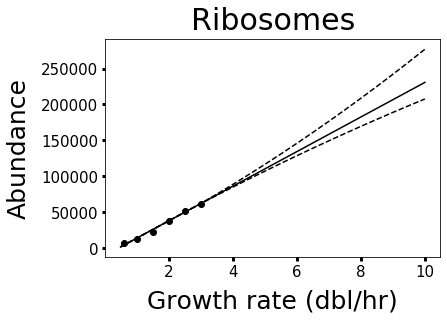

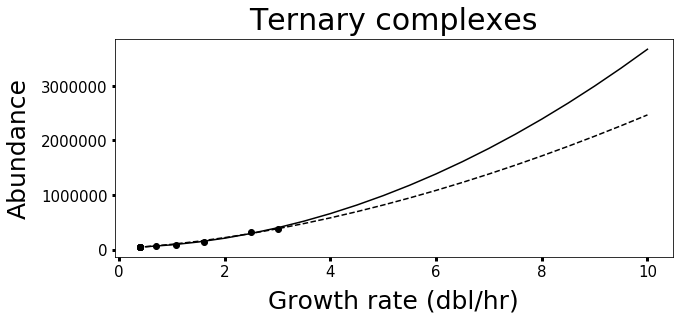

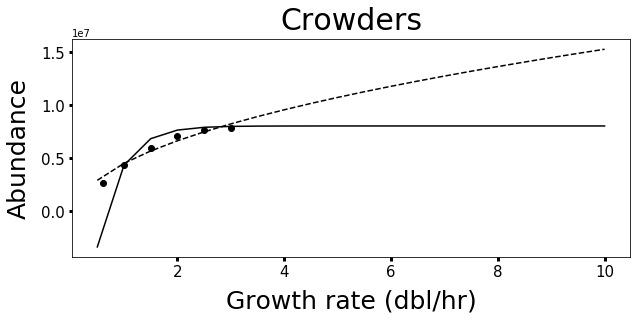

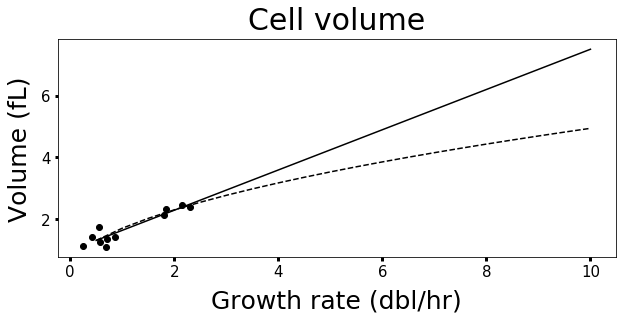

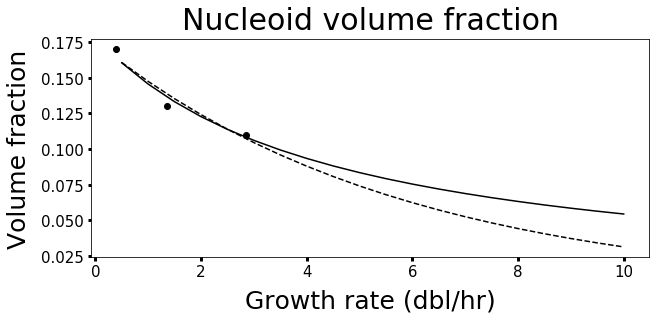

In [2]:
# Perform fits for extrapolation and plot

dr_plot = np.arange(0.5, 10.5, .5) # dr range to plot

# Ribosome
p_rib = np.polynomial.polynomial.polyfit(dr_rib, n_rib, 1)
n_rib_pred = np.polynomial.polynomial.polyval(dr_plot, p_rib)
n_rib_up = copy.copy(n_rib_pred)
n_rib_down = copy.copy(n_rib_pred)
val = .2/7
for i in range(len(n_rib_pred)):
    if dr_plot[i] > 3:
        dist = dr_plot[i] - 3
        n_rib_up[i] = (1 + dist*val)*n_rib_pred[i]
        n_rib_down[i] = (1 - .5*dist*val)*n_rib_pred[i]
        
plt.plot(dr_rib, n_rib, 'o', color='black')
plt.plot(dr_plot, n_rib_pred, color='black')
plt.plot(dr_plot, n_rib_up, '--', color='black')
plt.plot(dr_plot, n_rib_down, '--', color='black')
plt.rcParams["figure.figsize"] = (10,4)
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Ribosomes',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
plt.show()

# Ternary complex
p_tern = np.polynomial.polynomial.polyfit(dr_tern, n_tern, 2)
n_tern_pred = np.polynomial.polynomial.polyval(dr_plot, p_tern)
n_tern_scaled = n_tern**(1/1.75)
p_tern2 = np.polynomial.polynomial.polyfit(dr_tern, n_tern_scaled, 1)
n_tern_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_tern2)**1.75
plt.plot(dr_tern, n_tern, 'o', color='black')
plt.plot(dr_plot, n_tern_pred, color='black')
plt.plot(dr_plot, n_tern_pred2, '--', color='black')
plt.rcParams["figure.figsize"] = (10,4)
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Ternary complexes',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
plt.show()

# Crowder
p_crowd = np.polynomial.polynomial.polyfit(dr_crowd, np.log(7.8e6 - n_crowd), 1)
n_crowd_pred = 8e6 - np.exp(np.polynomial.polynomial.polyval(dr_plot, p_crowd))
p_crowd2 = np.polynomial.polynomial.polyfit(dr_crowd, n_crowd**(2), 1)
n_crowd_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_crowd2)**(1/2)
plt.plot(dr_crowd, n_crowd, 'o', color='black')
plt.plot(dr_plot, n_crowd_pred, color='black')
plt.plot(dr_plot, n_crowd_pred2, '--', color='black')
plt.rcParams["figure.figsize"] = (10,4)
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Crowders',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
plt.show()

# Cell volume
p_vol = np.polynomial.polynomial.polyfit(dr_vol,V_cell, 1)
V_cell_pred = np.polynomial.polynomial.polyval(dr_plot, p_vol)
p_vol2 = np.polynomial.polynomial.polyfit(dr_vol,V_cell**2, 1)
V_cell_pred2 = np.sqrt(np.polynomial.polynomial.polyval(dr_plot, p_vol2))
plt.plot(dr_vol, V_cell, 'o', color='black')
plt.plot(dr_plot, V_cell_pred, color='black')
plt.plot(dr_plot, V_cell_pred2, '--', color='black')
plt.rcParams["figure.figsize"] = (10,4)
plt.ylabel('Volume (fL)',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Cell volume',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
plt.show()

# Nucleoid volume fraction
p_nuc = np.polynomial.polynomial.polyfit(dr_nuc,phi_nuc**-1, 1)
phi_nuc_pred = 1/np.polynomial.polynomial.polyval(dr_plot, p_nuc)
p_nuc2 = np.polynomial.polynomial.polyfit(dr_nuc, np.log(phi_nuc), 1)
phi_nuc_pred2 = np.exp(np.polynomial.polynomial.polyval(dr_plot, p_nuc2))
plt.plot(dr_nuc, phi_nuc, 'o', color='black')
plt.plot(dr_plot, phi_nuc_pred, color='black')
plt.plot(dr_plot, phi_nuc_pred2, '--', color='black')
plt.rcParams["figure.figsize"] = (10,4)
plt.ylabel('Volume fraction',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Nucleoid volume fraction',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
plt.show()

In [64]:
dr_plot[:]

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [65]:
num_voxels = n_tern_pred/42

In [80]:
print((n_rib_pred[:]/(1-phi_nuc_pred))/num_voxels[:])
print(n_rib_pred[:]/num_voxels[:])

[1.57923591 7.80520381 9.00786114 8.69847802 8.01217465 7.28956516
 6.62732728 6.04586681 5.54195289 5.10594936 4.72751027 4.39733905
 4.10758101 3.85175725 3.62456819 3.42168296 3.23955254 3.07525502
 2.92637135 2.79088679]
[1.32577819 6.66900173 7.80814792 7.63080474 7.10024159 6.51611298
 5.96877653 5.48095355 5.05329112 4.67973864 4.35286588 4.06565089
 3.8119916  3.58675899 3.38569829 3.20529341 3.04263597 2.89531227
 2.76130984 2.63894196]


In [67]:
print(n_crowd_pred[:]/num_voxels[:])

[-2797.33399632  2100.39557915  2064.59411907  1537.26761961
  1121.71098362   837.8511362    644.57227085   509.48940894
   412.13278488   339.92005818   284.98743946   242.27825369
   208.44156158   181.19296573   158.9347367    140.52357635
   125.12456585   112.11683879   101.03115667    91.50767156]


In [86]:
print((V_cell_pred[:]/num_voxels[:])**(1/3)*1/5.9)

[0.01741808 0.01575019 0.01427815 0.01311631 0.01220279 0.01147085
 0.01087139 0.0103704  0.00994428 0.00957635 0.0092546  0.00897011
 0.00871618 0.00848768 0.00828057 0.00809168 0.00791842 0.00775872
 0.00761085 0.0074734 ]


In [82]:
# This function takes in the extrapolated raw numbers of each species and calculates relevant
# parameters, including the species and total volume fractions and the ratios of different 
# species and amount in a voxel.
def calc_values(n_rib_pred, n_tern_pred, n_crowd_pred, V_cell_pred, phi_nuc_pred):
    
    # Volume and amount of species in cytoplasm
    V_cyto = V_cell_pred*(1-phi_nuc_pred) # volume of cytoplasm
    n_rib_cyto = n_rib_pred # assume ribosomes are excluded from the nucleoid region
    n_tern_cyto = n_tern_pred*(1-phi_nuc_pred)
    n_crowd_cyto = n_crowd_pred*(1-phi_nuc_pred)
    
    # Voxel parameters and ratios:
    crowd_vox = 42*n_crowd_cyto/n_tern_cyto
    rib_vox = 42*n_rib_cyto/n_tern_cyto
    ratio_cr = n_crowd_cyto/n_rib_cyto
    ratio_tr = n_tern_cyto/n_rib_cyto
    
    # Size of each species:
    r_rib = 0.01305 # radius in um (note um**3 is same as fL)
    r_tern = 0.0059
    r_crowd = 0.002
    
    # Volume taken up by each species
    V_rib = n_rib_cyto*(4/3)*np.pi*r_rib**3
    V_tern = n_tern_cyto*(4/3)*np.pi*r_tern**3
    V_crowd = n_crowd_cyto*(4/3)*np.pi*r_crowd**3
    
    # Volume fractions
    phi_rib = V_rib/V_cyto
    phi_tern = V_tern/V_cyto
    phi_crowd = V_crowd/V_cyto
    phi_tot = phi_rib + phi_tern + phi_crowd
    
    # Volume of voxel
    V_vox = 42*(4/3)*np.pi/phi_tern # unitless, normalized by r_tern

    return phi_rib, phi_tern, phi_crowd, phi_tot, rib_vox, crowd_vox, ratio_cr, ratio_tr, V_vox
    
    

In [83]:
# Before we calculate the bounds, let's calculate the relevant voxel values for 
# the primary extrapolation.

phi_rib, phi_tern, phi_crowd, phi_tot, rib_vox, crowd_vox, ratio_cr, ratio_tr, V_vox = calc_values(n_rib_pred, n_tern_pred, n_crowd_pred, V_cell_pred, phi_nuc_pred)

In [91]:
V_vox**(1/3)/10*0.059

array([0.1027667 , 0.09292614, 0.08424111, 0.07738621, 0.07199644,
       0.06767802, 0.06414122, 0.06118536, 0.05867123, 0.05650049,
       0.05460211, 0.05292363, 0.05142549, 0.05007732, 0.04885539,
       0.04774088, 0.04671867, 0.04577643, 0.04490404, 0.04409307])

In [87]:
rib_vox

array([1.57923591, 7.80520381, 9.00786114, 8.69847802, 8.01217465,
       7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
       4.72751027, 4.39733905, 4.10758101, 3.85175725, 3.62456819,
       3.42168296, 3.23955254, 3.07525502, 2.92637135, 2.79088679])

In [88]:
crowd_vox

array([-2797.33399632,  2100.39557915,  2064.59411907,  1537.26761961,
        1121.71098362,   837.8511362 ,   644.57227085,   509.48940894,
         412.13278488,   339.92005818,   284.98743946,   242.27825369,
         208.44156158,   181.19296573,   158.9347367 ,   140.52357635,
         125.12456585,   112.11683879,   101.03115667,    91.50767156])